Part1 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def generate():
    x = np.arange(0,1,0.05)
    y = np.sin((np.power(x,2)+1))
    return x,y

def addnoise(y_curve, mu, sigma):
    noise = np.random.normal(mu,sigma,len(y_curve))
    y_noise = y_curve + noise
    return y_noise

def nummpy_poly_fit(x,y,M):
    z = np.polyfit(x,y,M)
    f = np.poly1d(z)
    return f

def MAP_fitting(x,y,m,a,b):
    n = len(x)
    mx = np.zeros([n,m+1])
    vy = y
    for i in range(n):
        for j in range(0,m+1):
            mx[i][j] = np.power(x[i],j)

    I = np.identity(m+1)
    w = b*linalg.pinv(b*np.dot(mx.T,mx)+a*I)
    w = np.dot(w,mx.T)
    w = np.dot(w,vy)
    return w

def MAP_paint(x,w):
    n = len(x)
    mx = np.zeros([n, len(w)])
    for i in range(n):
        for j in range(0, len(w)):
            mx[i][j] = np.power(x[i], j)
    y_new = np.dot(mx, w)
    return y_new


--------------------------------------------------------------------------------------------------------------------------------------
1.Generate 50 2D-data points using the following function

In [2]:
#generate True data
x_ture,y_true = generate()

#fit on the actual data
f = nummpy_poly_fit(x_ture, y_true, 3)
x_curve = np.linspace(x_ture[0],x_ture[-1],50)
y_curve = f(x_curve)


--------------------------------------------------------------------------------------------------------------------------------------
2.Add Gaussian random noise to the data

In [3]:
#add noise on the True data
y_noise = addnoise(y_curve,0,0.04)
x_noise = x_curve


--------------------------------------------------------------------------------------------------------------------------------------
3.Show the original curve line and the noisy data

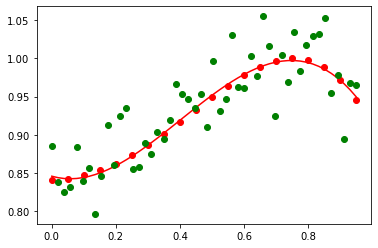

In [4]:
plt.plot(x_ture,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------
4.Fit the generated noisy data using the MAP as discussed in class.

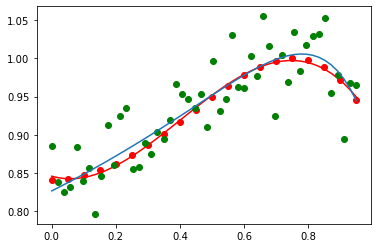

In [5]:
w = MAP_fitting(x_noise, y_noise, 10, 0.2, 1)
y_predict = MAP_paint(x_noise,w)

plt.plot(x_ture,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict)
plt.show()



--------------------------------------------------------------------------------------------------------------------------------------
5.Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w

In [6]:
error_abs = abs(y_curve-y_predict)
print("absolutely error value:", error_abs)
print("total absolutely error value:",error_abs.sum())

absolutely error value: [0.01918824 0.01314417 0.00784986 0.00326357 0.00065636 0.0039515
 0.00666334 0.00883324 0.01050241 0.0117119  0.01250256 0.01291501
 0.01298958 0.0127663  0.01228479 0.01158425 0.01070335 0.00968014
 0.00855199 0.0073554  0.00612592 0.00489798 0.00370468 0.00257761
 0.00154658 0.00063935 0.00011867 0.00070481 0.00109956 0.00128702
 0.00125547 0.00099795 0.00051293 0.00019484 0.00111354 0.00222327
 0.00349494 0.00488907 0.00635442 0.00782646 0.00922569 0.01045577
 0.01140142 0.01192616 0.01186979 0.01104554 0.00923708 0.0061951
 0.00163365 0.00477389]
total absolutely error value: 0.33642714256171713




--------------------------------------------------------------------------------------------------------------------------------------
6.Display the estimated values of w

In [7]:
print("estimated w:",w)

estimated w: [ 0.82671859  0.21142699  0.080365    0.01793325 -0.01366292 -0.02994996
 -0.03810755 -0.04172108 -0.04268547 -0.04205272 -0.04043623]



--------------------------------------------------------------------------------------------------------------------------------------
7.Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. On each the plot, you must show the values of M and alpha.

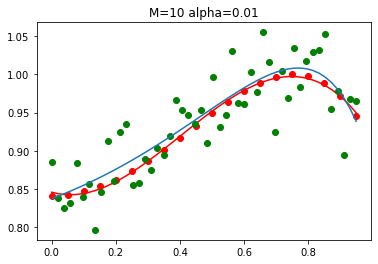

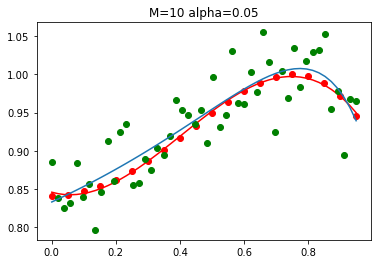

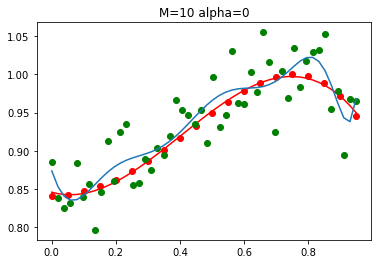

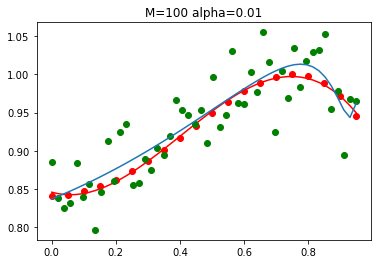

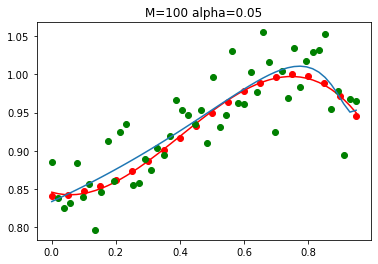

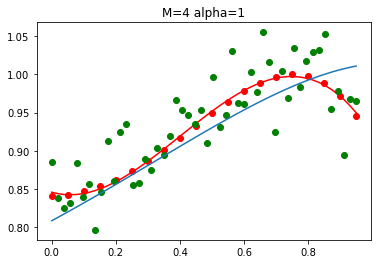

In [8]:
w = MAP_fitting(x_noise, y_noise, 10, 0.01, 1)
y_predict = MAP_paint(x_noise,w)

plt.figure()
plt.plot(x_ture,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict)
plt.title("M=10 alpha=0.01")
plt.show()

w = MAP_fitting(x_noise, y_noise, 10, 0.05, 1)
y_predict = MAP_paint(x_noise,w)

plt.figure()
plt.plot(x_ture,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict)
plt.title("M=10 alpha=0.05")
plt.show()

w = MAP_fitting(x_noise, y_noise, 10, 0, 1)
y_predict = MAP_paint(x_noise,w)

plt.figure()
plt.plot(x_ture,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict)
plt.title("M=10 alpha=0")
plt.show()

w = MAP_fitting(x_noise, y_noise, 100, 0.01, 1)
y_predict = MAP_paint(x_noise,w)

plt.figure()
plt.plot(x_ture,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict)
plt.title("M=100 alpha=0.01")
plt.show()

w = MAP_fitting(x_noise, y_noise, 100, 0.05, 1)
y_predict = MAP_paint(x_noise,w)

plt.figure()
plt.plot(x_ture,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict)
plt.title("M=100 alpha=0.05")
plt.show()

w = MAP_fitting(x_noise, y_noise, 4, 1, 1)
y_predict = MAP_paint(x_noise,w)

plt.figure()
plt.plot(x_ture,y_true,'ro')
plt.plot(x_curve,y_curve,"red")
plt.plot(x_noise,y_noise,"go")
plt.plot(x_curve,y_predict)
plt.title("M=4 alpha=1")
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------
8. From the experiment in #7, discuss how M and alpha influence on the fitting accuracy.

Answer: M and alpha represent the complexity of the fitting function. A large M may lead to overfitting, increasing alpha may alleviate the over fitting phenomenon.
    If M is large and alpha is small，the fitting curve will show obvious over fitting. Further more, according to image6, a too small M and too big alpha will lead to underfitting.
    As a result, it is necessary to set appropriate M and alpha.